In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading dataset from Postgresql database

In [3]:
os.chdir(r"C:\Users\John's PC\Documents\Python Stuff\Projects\Data Science\Categorical\Bank Marketing\scripts")

In [4]:
os.listdir()

['connect.py']

In [6]:
# %load connect.py
import psycopg2
import pandas as pd
import pandas.io.sql as psql

db_name = 'bank-marketing'
db_user = 'postgres'
db_password = 'myfile1'
db_host = 'localhost'
db_port = 5432

try:
    conn = psycopg2.connect(database=db_name,user=db_user,password=db_password,host=db_host,port=db_port)


    print("Database connected succesful")
except:
    print("No luck")




df = psql.read_sql("SELECT * FROM bank",conn)


Database connected succesful


In [7]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.0,58,management,married,tertiary,no,2143.0,yes,no,u,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,2.0,44,technician,single,secondary,no,29.0,yes,no,u,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,3.0,33,entrepreneur,married,secondary,no,2.0,yes,yes,u,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,4.0,47,blue-collar,married,unknown,no,1506.0,yes,no,u,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,5.0,33,unknown,single,unknown,no,1.0,no,no,u,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [8]:
#EDA

In [9]:
#EDA

In [10]:
for i in df.columns:
    nulls = df[i].isna().value_counts()


In [11]:
df[df.duplicated()]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


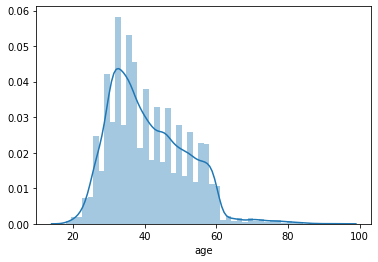

In [12]:
sns.distplot(df['age'])

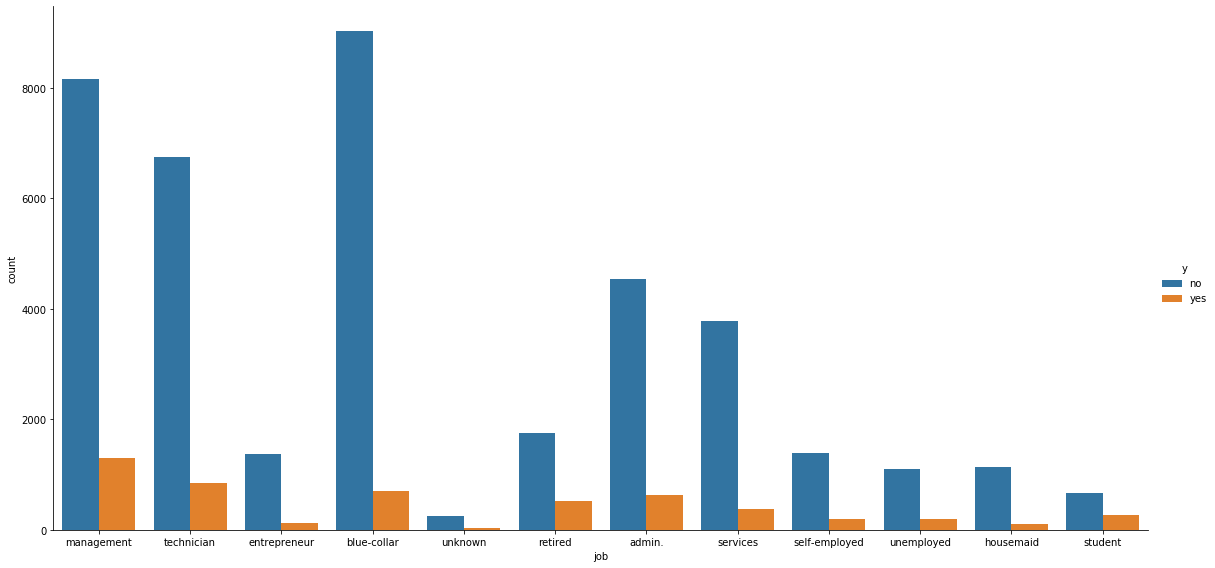

In [28]:
sns.catplot(x='job',kind='count',data=df,height=8,orient='h',aspect=2,hue='y');

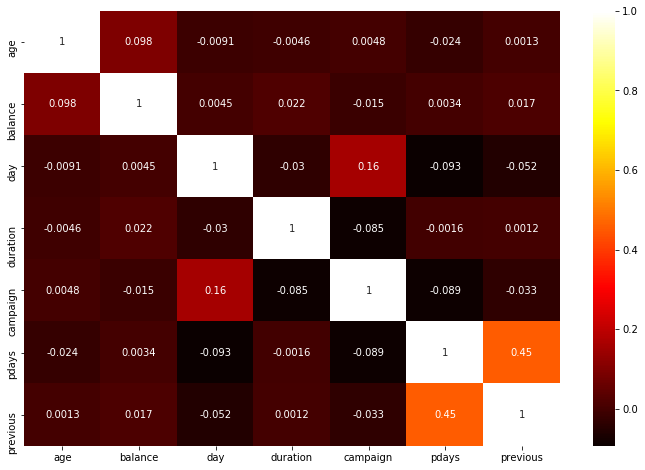

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop('id',axis=1).corr(),annot=True,cmap='hot')

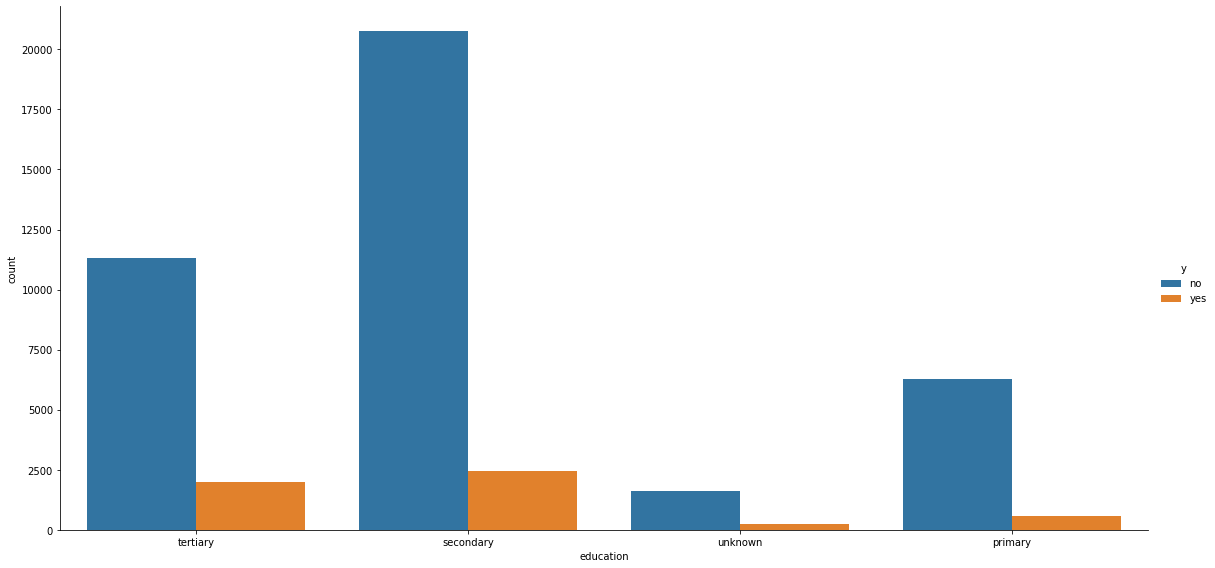

In [40]:
sns.catplot(x='education',kind='count',data=df,height=8,orient='h',aspect=2,hue='y');

In [61]:
dur_yes = df[(df['duration']>0)&(df['y']=='yes')]

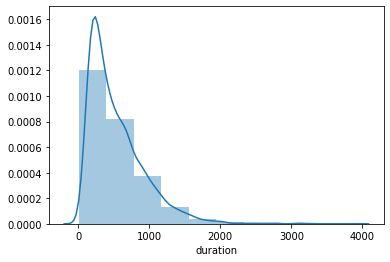

In [65]:
sns.distplot(dur_yes['duration'],bins=10)

In [ ]:
sns.catplot()

In [67]:
int(df['age'].mean())

40

In [68]:
df['balance'].mean()

1362.2720576850766

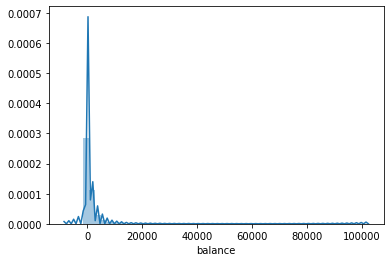

In [72]:
sns.distplot(df['balance'])

In [73]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC7952F9E8>,
      dtype=object)

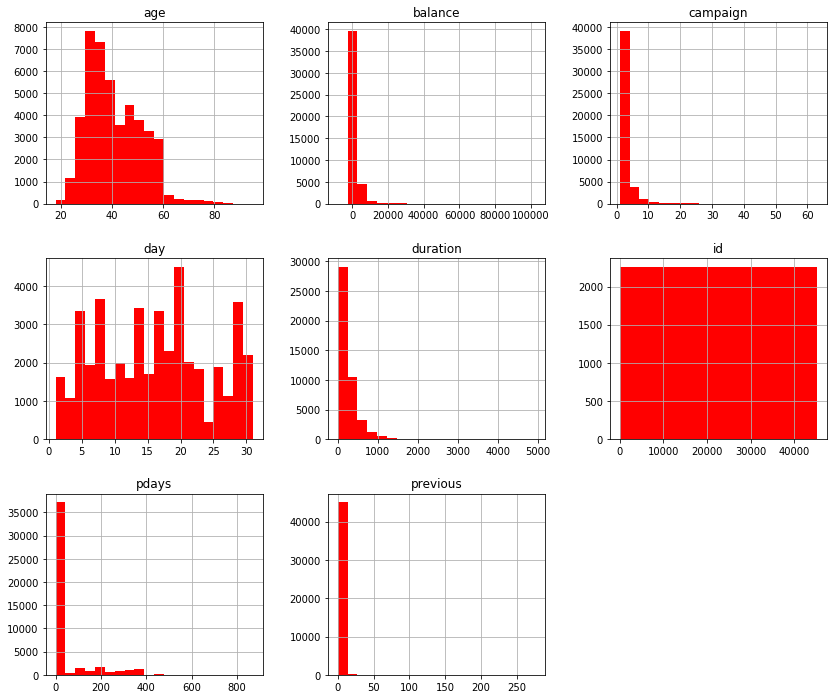

In [75]:
df.hist(bins=20,figsize=(14,12),color='red')